In [10]:
import pandas

In [10]:
!pip install yfinance

  Using cached yfinance-0.2.51-py2.py3-none-any.whl (104 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
     -------------------------------------- 948.2/948.2 kB 9.7 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139012 sha256=f7da9a3a46b0e63e6e6f4fe2c7ad1f872ffe89c0601d3d043e3123fcfa307252
  Stored in directory: c:\users\shedrack\appdata\local\pip\cache\wheels\06\b3\7f\ed42a7c83ad89f578928833f5789212c694a015b8bd6a407a1
Successfully built peewe

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [11]:
import yfinance as yf

# Define the cryptocurrency ticker
crypto_ticker = "BTC-USD"  
start_date = "2020-01-01"  
end_date = "2025-01-01"    

# Fetch historical data
data = yf.download(crypto_ticker, start=start_date, end=end_date, interval="1d")

print(data.head())


data.to_csv("crypto_data.csv")
print("Data saved to crypto_data.csv")



[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095
Data saved to crypto_data.csv


In [12]:
import yfinance as yf

# Define the cryptocurrency ticker
crypto_ticker = "SOL-USD"  
start_date = "2020-01-01"  
end_date = "2025-01-01"    

# Fetch historical data
data = yf.download(crypto_ticker, start=start_date, end=end_date, interval="1d")

print(data.head())

data.to_csv("crypto_data.csv")
print("Data saved to crypto_data.csv")



[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open    Volume
Ticker       SOL-USD   SOL-USD   SOL-USD   SOL-USD   SOL-USD
Date                                                        
2020-04-10  0.951054  1.313487  0.694187  0.832005  87364276
2020-04-11  0.776819  1.049073  0.765020  0.951054  43862444
2020-04-12  0.882507  0.956670  0.762426  0.785448  38736897
2020-04-13  0.777832  0.891603  0.773976  0.890760  18211285
2020-04-14  0.661925  0.796472  0.628169  0.777832  16747614
Data saved to crypto_data.csv


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
sns.set_style('darkgrid')
# Set the color palette to use
colors = ["#48A9A6", "#071010", "#000000"]
sns.set_palette(sns.color_palette(colors))


In [21]:
df = pd.read_csv('BTC-USD.csv')
# df.drop(index=[0,1], inplace=True)
df = df.iloc[2:]


In [22]:
df.tail()

,Price,Close,High,Low,Open,Volume
1824,2024-12-27,94164.859375,97294.84375,93310.7421875,95704.9765625,52419934565
1825,2024-12-28,95163.9296875,95525.8984375,94014.2890625,94160.1875,24107436185
1826,2024-12-29,93530.2265625,95174.875,92881.7890625,95174.0546875,29635885267
1827,2024-12-30,92643.2109375,94903.3203125,91317.1328125,93527.1953125,56188003691
1828,2024-12-31,93429.203125,96090.6015625,91914.03125,92643.25,43625106843


In [23]:
df.rename(columns={'Price': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')



In [24]:
df.set_index('Date', inplace=True)

In [26]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-01,7200.17431640625,7254.33056640625,7174.9443359375,7194.89208984375,18565664997
2020-01-02,6985.47021484375,7212.1552734375,6935.27001953125,7202.55126953125,20802083465
2020-01-03,7344.88427734375,7413.71533203125,6914.99609375,6984.4287109375,28111481032
2020-01-04,7410.65673828125,7427.3857421875,7309.51416015625,7345.37548828125,18444271275
2020-01-05,7411.3173828125,7544.4970703125,7400.53564453125,7410.45166015625,19725074095


In [27]:
df[['Close','Open','Low','High','Volume']] = df[['Close','Open','Low','High','Volume']].astype('float')

In [28]:
df['Daily Return'] = df['Close'].pct_change() #percentage change 

In [29]:
df.head()

,Close,High,Low,Open,Volume,Daily Return
Date,,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,1.856566e+10,NaN
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,2.080208e+10,-0.029819
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,2.811148e+10,0.051452
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,1.844427e+10,0.008955
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,1.972507e+10,0.000089


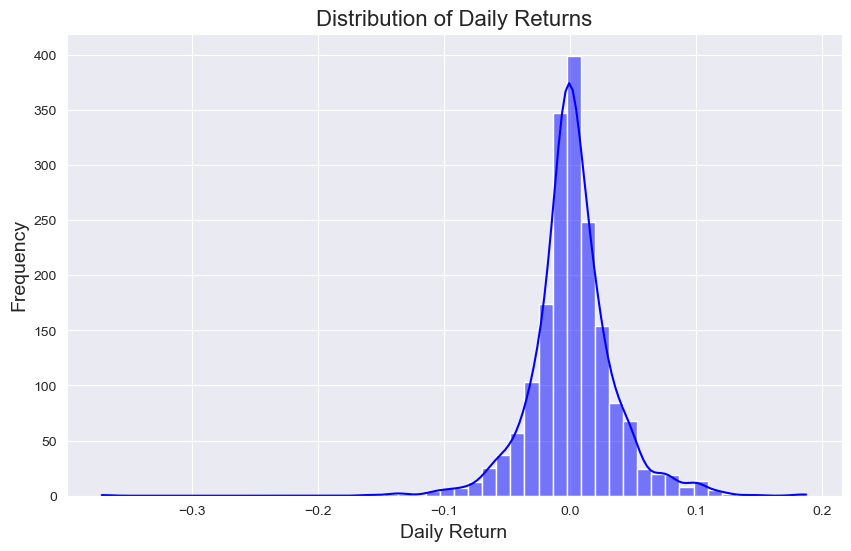

In [30]:
#analysing daily returns
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), kde=True, bins=50, color='blue')
plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [31]:
df['Rolling std'] = df['Close'].rolling(window=30).std()

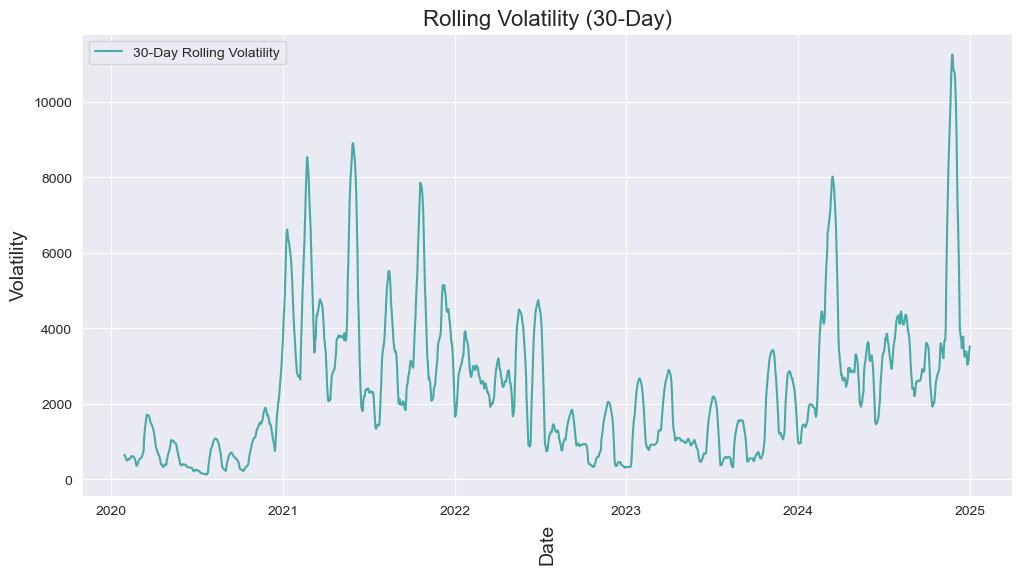

In [32]:
# Rolling volatility (30-day rolling standard deviation)
df['Rolling Std'] = df['Close'].rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(df['Rolling Std'], label='30-Day Rolling Volatility')
plt.title('Rolling Volatility (30-Day)', fontsize=16)
plt.xlabel('Date', fontsize=14,rotation=90)
plt.ylabel('Volatility', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

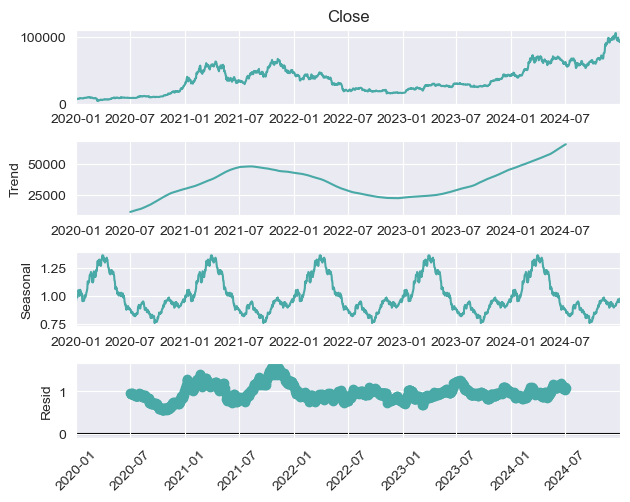

In [33]:
# Seasonal decomposition
decompose_result = seasonal_decompose(df['Close'].dropna(), model='multiplicative', period=365)
decompose_result.plot()
plt.xticks(rotation='45')
plt.show()

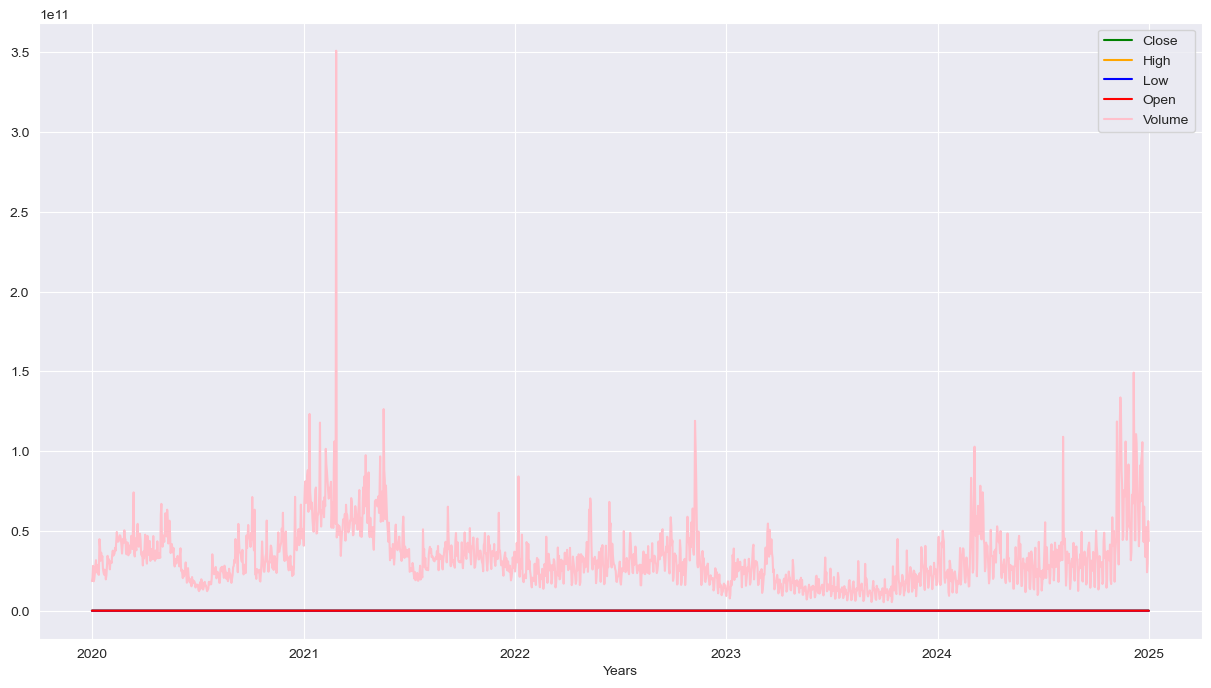

In [38]:
# Set the figure size and style
plt.figure(figsize=(15, 8))

plt.xlabel('Years')
'Close', 'High', 'Low', 'Open', 'Volume'
plt.plot(df.index, df['Close'], color='g', label='Close')
plt.plot(df.index, df['High'], color='orange', label='High')
plt.plot(df.index, df['Low'], color='b', label='Low')
plt.plot(df.index, df['Open'], color='r', label='Open')
plt.plot(df.index, df['Volume'], color='pink', label='Volume')

plt.legend()
plt.show()

In [40]:
# convert to datetime index
df.index = pd.to_datetime(df.index)

In [ ]:
#resampling data to monthly average
df_avg = df[['Close', 'High', 'Low', 'Open', 'Volume']].resample('W').mean()
colors = sns.palettes('husl', 5)

In [ ]:
plt.plot(df_avg.index, df_avg['Close'], color=colors[0], label='Close')
plt.plot(df_avg.index, df_avg['High'], color=colors[1], label='High')
plt.plt(df_avg.index, df_avg['Low'], color=colors[2], label='Low')
plt.plot(df_avg.index, df_avg['Open'], color=colors[3], label='Opene5')

# use sec y-axis for volumn
ax = plt.gca()
ax2 = ax.twinx()

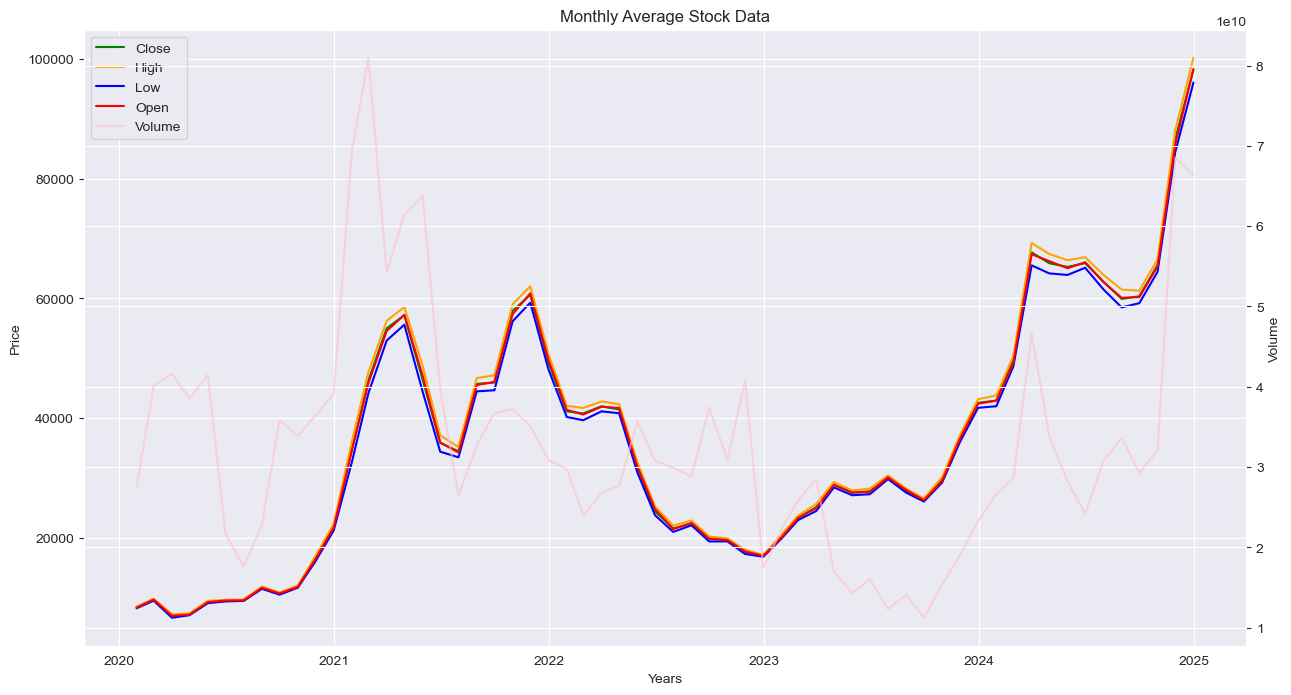

In [39]:
# Ensure the index is a datetime index
df.index = pd.to_datetime(df.index)

# Resample to monthly average
df_resampled = df[['Close', 'High', 'Low', 'Open', 'Volume']].resample('M').mean()

# Set the figure size and style
plt.figure(figsize=(15, 8))

# Plot financial data
plt.plot(df_resampled.index, df_resampled['Close'], color='g', label='Close')
plt.plot(df_resampled.index, df_resampled['High'], color='orange', label='High')
plt.plot(df_resampled.index, df_resampled['Low'], color='b', label='Low')
plt.plot(df_resampled.index, df_resampled['Open'], color='r', label='Open')

# Use a secondary y-axis for Volume
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(df_resampled.index, df_resampled['Volume'], color='pink', label='Volume', alpha=0.6)

# Set labels and title
ax.set_xlabel('Years')
ax.set_ylabel('Price')
ax2.set_ylabel('Volume')

# Combine legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

# Display the plot
plt.title('Monthly Average Stock Data')
plt.show()